![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [5]:
df.shape

(541462, 3)

<Axes: >

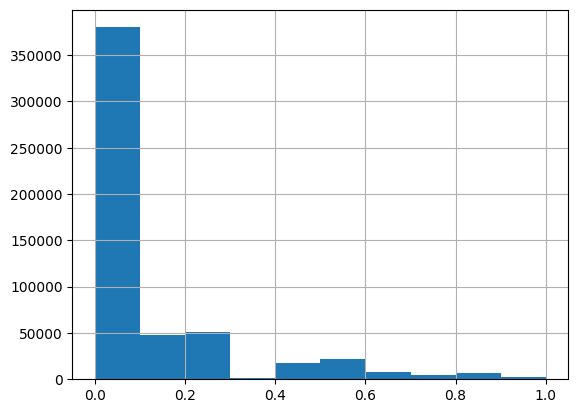

In [6]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [7]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [30]:
# Celda 1

count_vect = CountVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.7
)

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_counts, y_train)

y_pred = model.predict(X_test_counts)

In [38]:
# Calculos de métricas de rendimiento
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE: {rmse:.6f}")
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2:.6f}")
umbral_toxicidad = 0.5
y_test_binary = (y_test >= umbral_toxicidad).astype(int)
auc_roc = roc_auc_score(y_test_binary, y_pred)
print(f"AUC: {auc_roc:.6f}")

RMSE: 0.156173
R2: 0.375156
AUC: 0.898230


In [ ]:
# Términos más asociados a toxicidad

feature_names = count_vect.get_feature_names_out()
coefs = model.coef_

top_positive_coefs = np.argsort(coefs)[-30:]
print("\nPalabras más asociadas con toxicidad:")
for i in top_positive_coefs:
    print(f"{feature_names[i]}: {coefs[i]:.4f}")
terminos_unigrams = [(feature_names[i], coefs[i]) for i in top_positive_coefs][::-1]


Palabras más asociadas con toxicidad:
disgusting: 0.2042
traitor: 0.2054
liar: 0.2061
silly: 0.2140
ridiculous: 0.2199
foolish: 0.2209
troll: 0.2226
suck: 0.2246
ignorant: 0.2366
fool: 0.2375
loser: 0.2389
jerk: 0.2395
darn: 0.2407
sucks: 0.2413
clowns: 0.2426
clown: 0.2501
damn: 0.2772
fools: 0.2803
dumb: 0.2906
hypocrites: 0.2963
crap: 0.3087
pathetic: 0.3215
ass: 0.3263
moron: 0.3358
stupid: 0.3427
hypocrite: 0.3441
stupidity: 0.3538
idiotic: 0.4038
idiots: 0.4290
idiot: 0.4498


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
# Celda 2

count_vect_trigrams = CountVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.7,
    ngram_range=(3, 3) # Se consideran trigramas
)

X_train_counts_trigrams = count_vect_trigrams.fit_transform(X_train)
X_test_counts_trigrams = count_vect_trigrams.transform(X_test)

# Modelo de regresión lineal con trigramas
model_trigrams = LinearRegression()
model_trigrams.fit(X_train_counts_trigrams, y_train)

y_pred_trigrams = model_trigrams.predict(X_test_counts_trigrams)

In [37]:
# Calculos de métricas de rendimiento
rmse_trigrams = mean_squared_error(y_test, y_pred_trigrams) ** 0.5
print(f"RMSE: {rmse_trigrams:.6f}")
r2_trigrams = r2_score(y_test, y_pred_trigrams)
print(f"R2: {r2_trigrams:.6f}")
auc_roc_trigrams = roc_auc_score(y_test_binary, y_pred_trigrams)
print(f"AUC: {auc_roc_trigrams:.6f}")

RMSE: 0.195184
R2: 0.024000
AUC: 0.612459


In [ ]:
# Términos más asociados a toxicidad

feature_names_trigrams = count_vect_trigrams.get_feature_names_out()
coefs_trigrams = model_trigrams.coef_

top_positive_coefs_trigrams = np.argsort(coefs_trigrams)[-30:]
print("\nTrigramas más asociados con toxicidad:")
for i in top_positive_coefs_trigrams:
    print(f"{feature_names_trigrams[i]}: {coefs_trigrams[i]:.4f}")
terminos_trigrams = [(feature_names_trigrams[i], coefs_trigrams[i]) for i in top_positive_coefs_trigrams][::-1]


Trigramas más asociados con toxicidad:
you sound like: 0.0896
list goes on: 0.0926
out of office: 0.0930
your comments are: 0.0934
you re just: 0.0945
think we are: 0.0957
these people are: 0.0959
should be fired: 0.0961
because you are: 0.0968
he is an: 0.0984
should be ashamed: 0.0984
he is just: 0.0984
is nothing but: 0.0990
out of your: 0.0991
for the sake: 0.0998
is wrong with: 0.1079
the near future: 0.1105
is the worst: 0.1235
black lives matter: 0.1247
you are one: 0.1260
this guy is: 0.1323
the guy is: 0.1422
shame on you: 0.1507
what the heck: 0.1518
you are an: 0.1629
the man is: 0.1709
what the hell: 0.1945
you re an: 0.2765
what bunch of: 0.3146
trump is an: 0.3349


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#### Celda 3


**Definición TfidfVectorizer**

El TfidfVectorizer es una herramienta de procesamiento de texto utilizada en el campo del procesamiento de lenguaje natural (NLP). Su función principal es convertir un conjunto de documentos de texto en una matriz numérica que los algoritmos de aprendizaje automático puedan procesar. A diferencia del CountVectorizer, que simplemente cuenta la frecuencia de aparición de cada palabra en los documentos, el TfidfVectorizer asigna un peso a cada palabra basado en dos factores:​

- TF (Term Frequency): Frecuencia de la palabra en un documento específico.

- IDF (Inverse Document Frequency): Frecuencia inversa de la palabra en todo el corpus de documentos.​


Este enfoque permite que palabras que son comunes en todo el corpus, como "de" o "el", tengan un peso bajo, mientras que palabras que son frecuentes en un documento pero raras en el corpus, como "inteligencia" en un artículo sobre IA, tengan un peso alto. 

**Funcionamiento del TfidfVectorizer**

**Term Frequency (TF):** Mide la frecuencia con la que aparece un término en un documento. Se puede calcular como:

- Frecuencia bruta (conteo simple)
- Frecuencia logarítmicamente escalada: 1 + log(tf)
- Frecuencia cuadrática: tf^2


**Inverse Document Frequency (IDF):** Mide qué tan importante es un término en toda la colección de documentos. Términos comunes que aparecen en muchos documentos tendrán un IDF bajo, mientras que términos raros que aparecen en pocos documentos tendrán un IDF alto.
IDF(t) = log(N / df(t))
Donde:

- N es el número total de documentos
- df(t) es el número de documentos que contienen el término t


**TF-IDF:** Es el producto de estos dos componentes:
TF-IDF = TF * IDF
Este valor será:

- Alto para términos que aparecen frecuentemente en un documento pero raramente en toda la colección
- Bajo para términos que aparecen mucho en todos los documentos o que aparecen raramente en un documento específico

**Comparativa: TfidfVectorizer vs. CountVectorizer**

| Característica                 | CountVectorizer                          | TfidfVectorizer                           |
|--------------------------------|------------------------------------------|-------------------------------------------|
| **Método de ponderación**      | Cuenta simple de palabras                | Ponderación TF-IDF                        |
| **Considera frecuencia global** | No                                       | Sí                                        |
| **Destaca palabras clave**     | No                                       | Sí                                        |
| **Sensibilidad a palabras comunes** | Alta (palabras comunes tienen alto peso) | Baja (palabras comunes tienen bajo peso)  |
| **Uso recomendado**            | Análisis de frecuencia simple            | Modelado de temas, clasificación, búsqueda|



**Ventajas del TfidfVectorizer sobre CountVectorizer**

- **Ponderación por relevancia:** Al ponderar los términos, TfidfVectorizer destaca las palabras que son más distintivas o importantes para cada documento, lo que puede mejorar significativamente el rendimiento de los modelos de clasificación y regresión.
- **Reducción del impacto de palabras comunes:** TfidfVectorizer reduce el impacto de las palabras comunes en el modelo, lo que puede mejorar la precisión y la generalización del modelo.
- **Capacidad de adaptación:** TfidfVectorizer es flexible y puede adaptarse a diferentes tipos de documentos y dominios, lo que puede ser útil en tareas de análisis de texto más amplias.

**Desventajas de TfidfVectorizer frente a CountVectorizer**

- **Complejidad computacional:** TfidfVectorizer requiere más recursos para calcular y almacenar los pesos, lo que puede ser costoso en entornos de procesamiento de texto.
- **No captura contexto semántico:** TfidfVectorizer no considera el significado o relaciones entre palabras, lo que puede limitar su capacidad para representar el contexto de un documento.
- **Dependencia del corpus:** TfidfVectorizer depende del corpus completo, lo que significa que la representación de un documento puede cambiar si cambia el corpus, mientras que los conteos brutos son independientes de otros documentos.


**Referencias**

Jurafsky, D., & Martin, J. H. (2023). Speech and language processing (3.ª ed.). 

Manning, C. D., Raghavan, P., & Schütze, H. (2008). Introduction to information retrieval. Cambridge University Press.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [35]:
# Celda 4

tfidf_vect = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.7
)

# Aplicando TfidfVectorizer a los datos de entrenamiento y test
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Modelo de regresión lineal con TfidfVectorizer y entrenamiento
model_tfidf = LinearRegression()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [73]:
# Calculos de métricas de rendimiento
rmse_tfidf = mean_squared_error(y_test, y_pred_tfidf) ** 0.5
print(f"RMSE: {rmse_tfidf:.6f}")
r2_tfidf = r2_score(y_test, y_pred_tfidf)
print(f"R2: {r2_tfidf:.6f}")
auc_roc_tfidf = roc_auc_score(y_test_binary, y_pred_tfidf)
print(f"AUC: {auc_roc_tfidf:.6f}")

RMSE: 0.143780
R2: 0.470388
AUC: 0.907896


In [ ]:
# Términos más asociados a toxicidad

feature_names_tfidf = tfidf_vect.get_feature_names_out()
coefs_tfidf = model_tfidf.coef_

top_positive_coefs_tfidf = np.argsort(coefs_tfidf)[-30:]
print("\nTérminos más asociados con toxicidad (TF-IDF):")
for i in top_positive_coefs_tfidf:
    print(f"{feature_names_tfidf[i]}: {coefs_tfidf[i]:.4f}")
terminos_tfidf = [(feature_names_tfidf[i], coefs_tfidf[i]) for i in top_positive_coefs_tfidf][::-1]


Términos más asociados con toxicidad (TF-IDF):
liar: 0.8718
losers: 0.8810
hypocritical: 0.8914
loser: 0.9153
suck: 0.9275
darn: 0.9324
clowns: 0.9420
sucks: 0.9427
clown: 0.9510
silly: 0.9595
garbage: 0.9786
jerk: 1.0662
foolish: 1.1070
ridiculous: 1.1318
fool: 1.1601
damn: 1.1729
dumb: 1.2082
ignorant: 1.2324
pathetic: 1.2368
hypocrites: 1.2446
ass: 1.2652
moron: 1.2656
fools: 1.2803
hypocrite: 1.2859
crap: 1.4432
stupidity: 1.5330
idiot: 1.5435
idiotic: 1.5572
idiots: 1.6746
stupid: 1.7946


#### Se realiza el método TfidfVectorizer con los trigramas para realizar la comparación de métricas

In [72]:
tfidf_vect_trigrams = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.7,
    ngram_range=(3, 3) # Se consideran trigramas
)

# Aplicando TfidfVectorizer a los datos de entrenamiento y test
X_train_tfidf_trigrams = tfidf_vect_trigrams.fit_transform(X_train)
X_test_tfidf_trigrams = tfidf_vect_trigrams.transform(X_test)

# Modelo de regresión lineal con TfidfVectorizer y entrenamiento
model_tfidf_trigrams = LinearRegression()
model_tfidf_trigrams.fit(X_train_tfidf_trigrams, y_train)
y_pred_tfidf_trigrams = model_tfidf_trigrams.predict(X_test_tfidf_trigrams)

In [75]:
# Calculos de métricas de rendimiento
rmse_tfidf_trigrams = mean_squared_error(y_test, y_pred_tfidf_trigrams) ** 0.5
print(f"RMSE: {rmse_tfidf_trigrams:.6f}")
r2_tfidf_trigrams = r2_score(y_test, y_pred_tfidf_trigrams)
print(f"R2: {r2_tfidf_trigrams:.6f}")
auc_roc_tfidf_trigrams = roc_auc_score(y_test_binary, y_pred_tfidf_trigrams)
print(f"AUC: {auc_roc_tfidf_trigrams:.6f}")

RMSE: 0.194566
R2: 0.030169
AUC: 0.615108


In [76]:
# Términos más asociados a toxicidad

feature_names_tfidf_trigrams = tfidf_vect_trigrams.get_feature_names_out()
coefs_tfidf_trigrams = model_tfidf_trigrams.coef_

top_positive_coefs_tfidf_trigrams = np.argsort(coefs_tfidf_trigrams)[-30:]
print("\nTérminos más asociados con toxicidad (TF-IDF):")
for i in top_positive_coefs_tfidf_trigrams:
    print(f"{feature_names_tfidf_trigrams[i]}: {coefs_tfidf_trigrams[i]:.4f}")
terminos_tfidf_trigrams = [(feature_names_tfidf_trigrams[i], coefs_tfidf_trigrams[i]) for i in top_positive_coefs_tfidf_trigrams]


Términos más asociados con toxicidad (TF-IDF):
he is an: 0.1930
this country is: 0.1964
out of office: 0.1979
people of color: 0.2006
trump is the: 0.2008
who voted for: 0.2030
because he is: 0.2035
donald trump is: 0.2095
be removed from: 0.2114
the death penalty: 0.2169
out of your: 0.2185
you are the: 0.2197
is nothing but: 0.2201
this guy is: 0.2242
the guy is: 0.2392
is the worst: 0.2393
you are one: 0.2395
shame on you: 0.2402
black lives matter: 0.2443
these people are: 0.2448
is wrong with: 0.2480
the near future: 0.2596
for the sake: 0.2667
what the heck: 0.2733
the man is: 0.2969
what the hell: 0.3422
you are an: 0.3604
what bunch of: 0.4664
you re an: 0.4994
trump is an: 0.6454


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

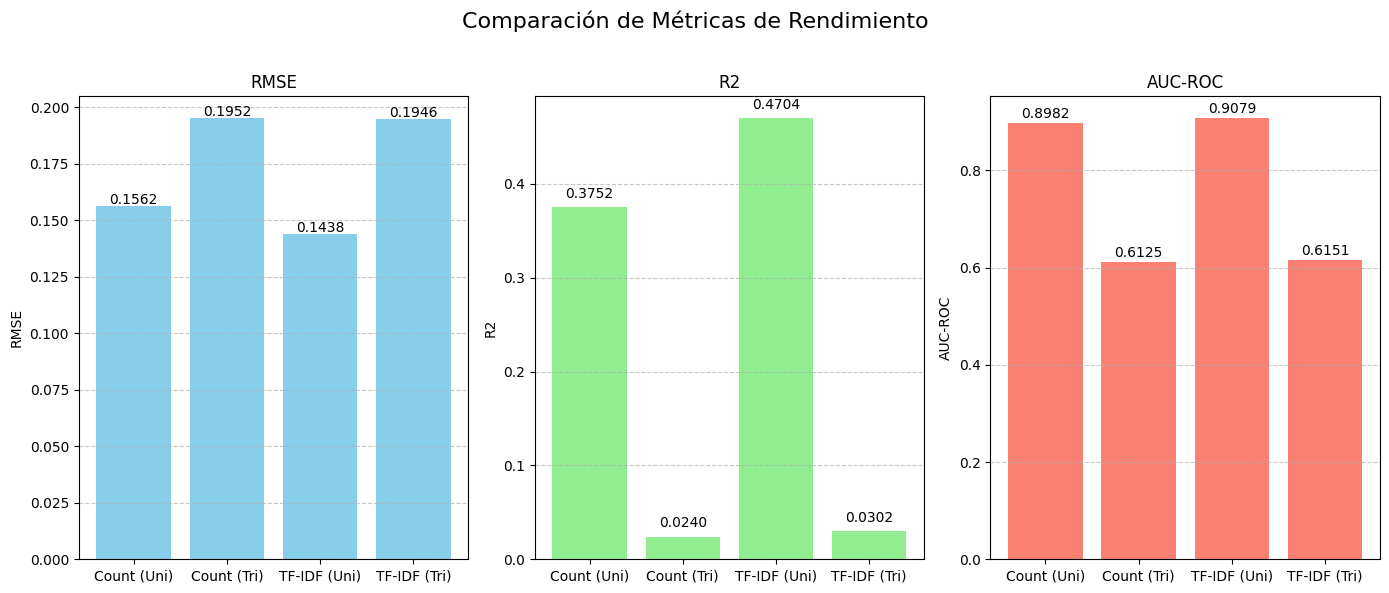

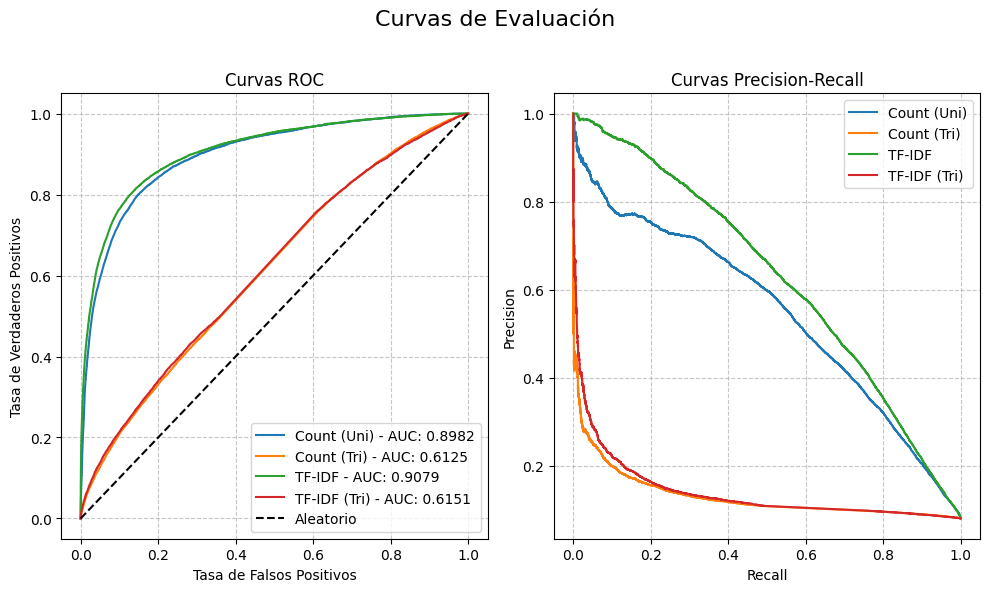

In [79]:
# Celda 5

# Comparación de métricas de rendimiento
modelos = ['Count (Uni)', 'Count (Tri)', 'TF-IDF (Uni)', 'TF-IDF (Tri)']
rmse_valores = [rmse, rmse_trigrams, rmse_tfidf, rmse_tfidf_trigrams]
r2_valores = [r2, r2_trigrams, r2_tfidf, r2_tfidf_trigrams]
auc_valores = [auc_roc, auc_roc_trigrams, auc_roc_tfidf, auc_roc_tfidf_trigrams]

# Comparativa gráfica de métricas
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 6))
fig.suptitle('Comparación de Métricas de Rendimiento', fontsize=16)

# Gráfico RMSE
ax1.bar(modelos, rmse_valores, color='skyblue')
ax1.set_title('RMSE')
ax1.set_ylabel('RMSE')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_valores):
    ax1.text(i, v + 0.001, f'{v:.4f}', ha='center')

# Gráfico R2
ax2.bar(modelos, r2_valores, color='lightgreen')
ax2.set_title('R2')
ax2.set_ylabel('R2')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(r2_valores):
    text_y = v + 0.01 if v > 0 else v - 0.15
    ax2.text(i, text_y, f'{v:.4f}', ha='center')

# 3. Gráfico AUC-ROC
ax3.bar(modelos, auc_valores, color='salmon')
ax3.set_title('AUC-ROC')
ax3.set_ylabel('AUC-ROC')
ax3.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(auc_valores):
    ax3.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Curva ROC y Precision-Recall 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Curvas de Evaluación', fontsize=16)

# 1. Curvas ROC
# Unigramas
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
ax1.plot(fpr, tpr, label=f'Count (Uni) - AUC: {auc_roc:.4f}')

# Trigramas
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_trigrams)
ax1.plot(fpr, tpr, label=f'Count (Tri) - AUC: {auc_roc_trigrams:.4f}')

# TfidfVectorizer Unigramas
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_tfidf)
ax1.plot(fpr, tpr, label=f'TF-IDF - AUC: {auc_roc_tfidf:.4f}')

# TfidfVectorizer Trigramas
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_tfidf_trigrams)
ax1.plot(fpr, tpr, label=f'TF-IDF (Tri) - AUC: {auc_roc_tfidf_trigrams:.4f}')

# Línea de referencia
ax1.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
ax1.set_xlabel('Tasa de Falsos Positivos')
ax1.set_ylabel('Tasa de Verdaderos Positivos')
ax1.set_title('Curvas ROC')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Curvas Precision-Recall
# Unigramas
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred)
ax2.plot(recall, precision, label='Count (Uni)')

# Trigramas
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_trigrams)
ax2.plot(recall, precision, label='Count (Tri)')

# TfidfVectorizer Unigramas
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_tfidf)
ax2.plot(recall, precision, label='TF-IDF')

# TfidfVectorizer Trigramas
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_tfidf_trigrams)
ax2.plot(recall, precision, label='TF-IDF (Tri)')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Curvas Precision-Recall')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [80]:
# Tabla comparativa métricas
df_comparacion = pd.DataFrame({
    'Modelo': ['CountVectorizer (Unigramas)', 'CountVectorizer (Trigramas)', 'TfidfVectorizer (Unigramas)', 'TfidfVectorizer (Trigramas)'],
    'RMSE': rmse_valores,
    'R²': r2_valores,
    'AUC-ROC': auc_valores
})
print("Tabla comparativa de métricas:")
df_comparacion

Tabla comparativa de métricas:


,Modelo,RMSE,R²,AUC-ROC
0,CountVectorizer (Unigramas),0.156173,0.375156,0.898230
1,CountVectorizer (Trigramas),0.195184,0.024000,0.612459
2,TfidfVectorizer (Unigramas),0.143780,0.470388,0.907896
3,TfidfVectorizer (Trigramas),0.194566,0.030169,0.615108


In [81]:
# DataFrame para los términos más asociados con toxicidad según los diferentes métodos
df_unigrams = pd.DataFrame(terminos_unigrams, columns=['Término', 'Coeficiente'])
df_unigrams['Rango'] = range(1, len(df_unigrams) + 1)
df_unigrams = df_unigrams[['Rango', 'Término', 'Coeficiente']]

df_trigrams = pd.DataFrame(terminos_trigrams, columns=['Término', 'Coeficiente'])
df_trigrams['Rango'] = range(1, len(df_trigrams) + 1)
df_trigrams = df_trigrams[['Rango', 'Término', 'Coeficiente']]

df_tfidf = pd.DataFrame(terminos_tfidf, columns=['Término', 'Coeficiente'])
df_tfidf['Rango'] = range(1, len(df_tfidf) + 1)
df_tfidf = df_tfidf[['Rango', 'Término', 'Coeficiente']]

df_tfidf_trigrams = pd.DataFrame(terminos_tfidf_trigrams, columns=['Término', 'Coeficiente'])
df_tfidf_trigrams['Rango'] = range(1, len(df_tfidf_trigrams) + 1)
df_tfidf_trigrams = df_tfidf_trigrams[['Rango', 'Término', 'Coeficiente']]

# Tabla comparativa
print("Términos más asociados con toxicidad según los diferentes métodos:")
df_comparativa = pd.concat(
    [df_unigrams.set_index('Rango'), 
     df_trigrams.set_index('Rango'), 
     df_tfidf.set_index('Rango'),
     df_tfidf_trigrams.set_index('Rango')], 
    axis=1, 
    keys=['CountVectorizer (Uni)', 'CountVectorizer (Tri)', 'TfidfVectorizer (Uni)', 'TfidfVectorizer (Tri)']
)
display(df_comparativa)


# Análisis comparativo de superposición de términos
# Conjuntos de términos
terminos_uni_set = set([t[0] for t in terminos_unigrams])
terminos_tri_set = set([t[0] for t in terminos_trigrams])
terminos_tfidf_set = set([t[0] for t in terminos_tfidf])
terminos_tfidf_tri_set = set([t[0] for t in terminos_tfidf_trigrams])

# Términos comunes
comunes_uni_tfidf = terminos_uni_set.intersection(terminos_tfidf_set)
comunes_tri_tfidf = terminos_tri_set.intersection(terminos_tfidf_tri_set)

print("\nAnálisis de superposición de términos:")
print(f"Términos comunes entre unigramas y TF-IDF: {len(comunes_uni_tfidf)} - {comunes_uni_tfidf}")
print(f"Términos comunes entre trigramas y TF-IDF_Trigramas: {len(comunes_tri_tfidf)} - {comunes_tri_tfidf}")

Términos más asociados con toxicidad según los diferentes métodos:


CountVectorizer (Uni)             CountVectorizer (Tri)              \
                    Término Coeficiente               Término Coeficiente   
Rango                                                                       
1                     idiot    0.449815           trump is an    0.334875   
2                    idiots    0.428989         what bunch of    0.314633   
3                   idiotic    0.403817             you re an    0.276534   
4                 stupidity    0.353792         what the hell    0.194465   
5                 hypocrite    0.344063            the man is    0.170880   
6                    stupid    0.342676            you are an    0.162947   
7                     moron    0.335821         what the heck    0.151826   
8                       ass    0.326269          shame on you    0.150728   
9                  pathetic    0.321483            the guy is    0.142248   
10                     crap    0.308714           this guy is    0.132308   
11               hypocrites    0.296275           you are one    0.125969   
12                     dumb    0.290574    black lives matter    0.124720   
13                    fools    0.280305          is the worst    0.123504   
14                     damn    0.277233       the near future    0.110452   
15                    clown    0.250091         is wrong with    0.107933   
16                   clowns    0.242567          for the sake    0.099779   
17                    sucks    0.241327           out of your    0.099102   
18                     darn    0.240665        is nothing but    0.099038   
19                     jerk    0.239508            he is just    0.098437   
20                    loser    0.238945     should be ashamed    0.098417   
21                     fool    0.237465              he is an    0.098365   
22                 ignorant    0.236582       because you are    0.096809   
23                     suck    0.224607       should be fired    0.096107   
24                    troll    0.222640      these people are    0.095947   
25                  foolish    0.220863          think we are    0.095695   
26               ridiculous    0.219927           you re just    0.094542   
27                    silly    0.214002     your comments are    0.093441   
28                     liar    0.206055         out of office    0.092995   
29                  traitor    0.205422          list goes on    0.092601   
30               disgusting    0.204238        you sound like    0.089573   

      TfidfVectorizer (Uni)             TfidfVectorizer (Tri)              
                    Término Coeficiente               Término Coeficiente  
Rango                                                                      
1                    stupid    1.794596              he is an    0.193038  
2                    idiots    1.674625       this country is    0.196380  
3                   idiotic    1.557159         out of office    0.197851  
4                     idiot    1.543460       people of color    0.200620  
5                 stupidity    1.533048          trump is the    0.200803  
6                      crap    1.443245         who voted for    0.203035  
7                 hypocrite    1.285855         because he is    0.203530  
8                     fools    1.280262       donald trump is    0.209529  
9                     moron    1.265569       be removed from    0.211371  
10                      ass    1.265208     the death penalty    0.216875  
11               hypocrites    1.244608           out of your    0.218503  
12                 pathetic    1.236759           you are the    0.219736  
13                 ignorant    1.232428        is nothing but    0.220139  
14                     dumb    1.208238           this guy is    0.224195  
15                     damn    1.172932            the guy is    0.239216  
16                     fool    1.160066          is the worst    0.239313  
17               rid


Análisis de superposición de términos:
Términos comunes entre unigramas y TF-IDF: 27 - {'clown', 'idiot', 'hypocrites', 'stupidity', 'jerk', 'clowns', 'darn', 'dumb', 'ridiculous', 'sucks', 'ignorant', 'silly', 'idiots', 'liar', 'hypocrite', 'crap', 'fools', 'loser', 'damn', 'foolish', 'suck', 'ass', 'stupid', 'fool', 'moron', 'pathetic', 'idiotic'}
Términos comunes entre trigramas y TF-IDF_Trigramas: 21 - {'black lives matter', 'the guy is', 'what the hell', 'you are one', 'trump is an', 'these people are', 'the man is', 'he is an', 'out of your', 'out of office', 'you are an', 'you re an', 'what bunch of', 'the near future', 'is nothing but', 'for the sake', 'shame on you', 'is the worst', 'this guy is', 'what the heck', 'is wrong with'}


### Punto 5.1 - Comparación y análisis de resultados


### Desempeño de los modelos

* El modelo que utilizó TF-IDF con unigramas obtuvo los mejores resultados en las métricas evaluadas:

    - Presentó el menor error cuadrático medio (RMSE más bajo).

    - Logró un mayor poder explicativo sobre la variabilidad de los datos (R2 cercano a 0.47).

    - Mostró una alta capacidad de discriminación entre clases (AUC-ROC superior a 0.9).

* Los mejores resultados en las métricas con TF-IDF viende de la mano en la robustez del mismo, ya que en los dos casos se tenían los mismos parámetros y se puede observar el incremento en las métricas de rendimiento respecto a los modelos de countvectorizer.

* El modelo que utilizó TF-IDF con trigramas tuvo un desempeño similar al countvectorizer, pero con un R2 y AUC-ROC más bajos. 

* En contraste, el modelo basado en CountVectorizer con trigramas tuvo un desempeño considerablemente inferior, con un R2 cercano a cero y un AUC-ROC bajo, lo cual sugiere que no logró aprender relaciones significativas.


### Curvas ROC y Precision-Recall

*ROC curves*

* TF-IDF y Unigrams tienen curvas muy parecidas y bien por encima de la diagonal (aleatorio).

* Countvectorizer y TF-IDF con trigramas tiene una curva más inclinada hacia la derecha, lo que sugiere que el comportamiento del modelo es muy cercano a la aleatoriedad. Esto sugiere que la predicción con trigramas y estos modelos no es la más adecuada para el problema.

*Precision-Recall curves*

* Los mejores resultados en las métricas con TF-IDF viende de la mano en la robustez del mismo, ya que en los dos casos se tenían los mismos parámetros y se puede observar el incremento en las métricas de rendimiento respecto a los modelos de countvectorizer.

* El modelo TF-IDF mantiene una alta precisión hasta niveles de recall medios (alrededor de 0.6), lo cual es muy positivo. Los otros modelos muestran caídas en la precisión a medida que el recall aumenta, reforzando las diferencias de desempeño observadas en las otras métricas.


### Términos más asociados con toxicidad

Los mismos términos fuertes (idiot, idiots, idiotic, stupidity, stupid, moron, crap…) aparecen en ambos enfoques, pero TF-IDF les asigna coeficientes mucho mayores: enfatiza las palabras menos frecuentes pero muy discriminativas.

Los trigramas listan frases como “trump is an”, “what bunch of” o “you re an” — sí son expresiones tóxicas, pero demasiado específicas y con muy baja frecuencia, lo que explica su escasa generalización.

La comparación entre los dos modelos muestra una alta coincidencia de términos entre CountVectorizer y TF-IDF (27 en unigramas y 21 en trigramas), lo que indica que ambos métodos capturan un núcleo de palabras y frases claramente asociadas a la toxicidad. La detección de frases específicas con trigramas (como "shame on you" o "what the hell") sugiere que el contexto es clave para identificar expresiones tóxicas. Además, TF-IDF, al penalizar términos muy frecuentes, ayuda a resaltar palabras y frases más representativas del fenómeno que CountVectorizer. Esto sugiere que trabajar con trigramas y TF-IDF puede ofrecer una detección más precisa de toxicidad que usando solo palabras sueltas.


### Conclusiones

* El modelo que utilizó TF-IDF con unigramas obtuvo los mejores resultados en las métricas evaluadas, encontrando un equilibrio entre error, capacidad explicativa y poder de discriminación.

* Es recomendable descartar trigramas puros bajo conteo, o bien combinarlos con unigramas/bigramas y ajustar min_df para evitar sparsity extrema.

* También, la opción de explorar bigramas (n-gram_range=(1,2)) en TF-IDF podría capturar expresiones compuestas (“you are”, “what the”) sin caer en la dispersión de los trigramas.